# **Algoritmos de Regresión**




## **Conceptos Interesantes**

**Bondad de ajuste del modelo**

Una vez ajustado el modelo, es necesario verificar su utilidad ya que, aun siendo la línea que mejor se ajusta a las observaciones de entre todas las posibles, puede tener un gran error. Las métricas más utilizadas para medir la calidad del ajuste son: el **error estándar** de los residuos y el coeficiente de determinación **$R^2$**


**Coeficiente de determinación  $R^2$**

$R^2$ describe la proporción de varianza de la variable respuesta explicada por el modelo y relativa a la varianza total. Su valor está acotado entre 0 y 1. Al ser adimensional, presenta la ventaja frente al RSE de ser más fácil de interpretar.


$R^{2}=\frac{\text{Suma de cuadrados totales - Suma de cuadrados residuales}}{\text{Suma de cuadrados totales}}=$

$1-\frac{\text{Suma de cuadrados residuales}}{\text{Suma de cuadrados totales}} =$

$1-\frac{\sum(\hat{y_i}-y_i)^2}{\sum(y_i-\overline{y})^2}$


* En los modelos de regresión lineal simple el valor de  $R^2$  se corresponde con el cuadrado del coeficiente de correlación de Pearson (r) entre  x  e  y , no siendo así en regresión múltiple.
* En los modelos lineales múltiples, cuantos más predictores se incluyan en el modelo, mayor es el valor de  $R^2$. Esto es así ya que, por poco que sea, cada predictor va a explicar una parte de la variabilidad observada en  y . Es por esto que  $R^2$ no puede utilizarse para comparar modelos con distinto número de predictores.

**Significancia del modelo F-test**

Uno de los primeros resultados que hay que evaluar al ajustar un modelo es el resultado del test de significancia  F . Este contraste responde a la pregunta de si el modelo en su conjunto es capaz de predecir la variable respuesta mejor de lo esperado por azar, o lo que es equivalente, si al menos uno de los predictores que forman el modelo contribuye de forma significativa. Para realizar este contraste se compara la suma de residuos cuadrados del modelo de interés con la del modelo sin predictores, formado únicamente por la media (también conocido como suma de cuadrados corregidos por la media,TSS)

**Intervalos de confianza**

Cuanto menor es el número de observaciones  n , menor la capacidad para calcular el error estándar del modelo. Como consecuencia, la exactitud de los coeficientes de regresión estimados se reduce. Esto tiene importancia sobretodo en la regresión múltiple.

En los modelos generados con statsmodels se devuelve, junto con el valor de los coeficientes de regresión, el valor del estadístico  t  obtenido para cada uno, los p-value y los intervalos de confianza correspondientes. Esto permite saber, además de las estimaciones, si son significativamente distintos de 0, es decir, si contribuyen al modelo.

Para que los cálculos descritos anteriormente sean válidos, se tiene que asumir que los residuos son independientes y que se distribuyen de forma normal con media 0 y varianza  σ2 . Cuando la condición de normalidad no se satisface, existe la posibilidad de recurrir a los test de permutación para calcular significancia (p-value) y al bootstrapping para calcular intervalos de confianza.


**Variables categóricas como predictores**

Cuando se introduce una variable categórica como predictor, un nivel se considera el de referencia (normalmente codificado como 0) y el resto de niveles se comparan con él. En el caso de que el predictor categórico tenga más de dos niveles, se generan lo que se conoce como variables dummy o one-hot-encodding, que son variables creadas para cada uno de los niveles del predictor categórico y que pueden tomar el valor de 0 o 1. Cada vez que se emplee el modelo para predecir un valor, solo una variable dummy por predictor adquiere el valor 1 (la que coincida con el valor que adquiere el predictor en ese caso) mientras que el resto se consideran 0. El valor del coeficiente parcial de regresión  βj  de cada variable dummy indica el porcentaje promedio en el que influye dicho nivel sobre la variable dependiente  y  en comparación con el nivel de referencia de dicho predictor.

# **0. Importando Librerias**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

# **1. Regresión lineal simple**

In [2]:
#@title Datos
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
datos.head(5)

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762


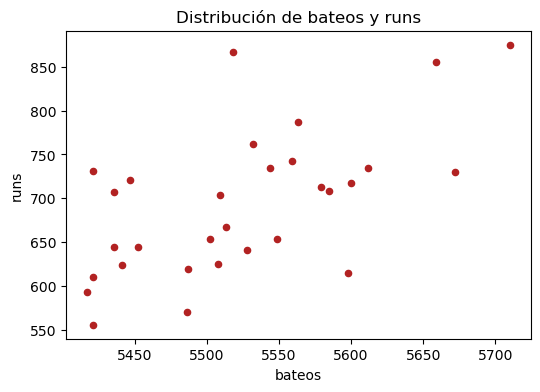

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))
datos.plot(x = 'bateos', y = 'runs',   c='firebrick',  kind = "scatter",ax =ax)
ax.set_title('Distribución de bateos y runs');

In [4]:
corr_test = pearsonr(x = datos['bateos'], y =  datos['runs'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6106270467206687
P-value:  0.0003388351359791978


In [5]:
datos.corr()

ValueError: could not convert string to float: 'Texas'

El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (r = 0.61) y significativa (p-value = 0.000339). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el número de runs en función del número de bateos del equipo.

In [ ]:
datos

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762
5,New_S.,5600,718
6,New_Y.,5518,867
7,Milwaukee,5447,721
8,Colorado,5544,735
9,Houston,5598,615


In [ ]:
X

In [ ]:
X = datos[['bateos']]
y = datos['runs']
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


## **Opcion 1: Usando SKLEARN**

In [ ]:
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

LinearRegression()

**Información del modelo**


In [ ]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-2367.7028413]
Coeficiente: [('bateos', 0.5528713534479736)]
Coeficiente de determinación R^2: 0.3586119899498744


**Pruebas**

In [ ]:
y_pred = modelo.predict(X =X_test)
rmse = mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred, squared = False)
print(f"El MSE es {mse}")
print(f"El RMSE es {rmse}")

El MSE es 59.336716083360486
El RMSE es 3520.8458755573306


## **Opción 2: Usando statsmodel**

In [ ]:
import statsmodels.api as sm
X_train2 = sm.add_constant(X_train, prepend = True)
X_test2 = sm.add_constant(X_test, prepend = True)
modelo_sm = sm.OLS(endog=y_train, exog =X_train2)
modelo_sm = modelo_sm.fit()
print(modelo_sm.summary())

In [ ]:
y_pred = modelo_sm.get_prediction(exog = X_test2).summary_frame(alpha=0.05)
y_pred.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,643.787421,19.905798,602.505323,685.069519,494.417495,793.157346
1,720.083668,18.956093,680.771137,759.396198,571.246045,868.921291
2,690.781486,14.331474,661.059827,720.503144,544.184965,837.378007
3,789.192587,39.404654,707.472336,870.912838,624.009772,954.375402
4,627.201280,24.338160,576.727026,677.675535,475.034223,779.368338


In [ ]:
y_pred = modelo_sm.predict(exog = X_test2)
y_pred

array([643.78742093, 720.0836677 , 690.78148597, 789.19258689,
       627.20128033, 697.41594221])

In [ ]:
rmse = mean_squared_error(y_test, y_pred)
rme = mean_squared_error(y_test, y_pred, squared = False)
print(f"El RMSE es {rmse}")
print(f"El RMSE es {rme}")

El RMSE es 3520.8458755574143
El RMSE es 59.33671608336119


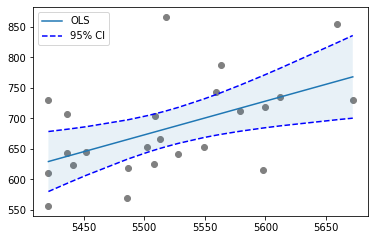

In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo_sm.get_prediction(exog = X_train2).summary_frame(alpha=0.05)
predicciones['x'] = X_train2[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='blue', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='blue')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [ ]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-2367.7028413]
Coeficiente: [('bateos', 0.5528713534479736)]
Coeficiente de determinación R^2: 0.3586119899498744


**Interpretación**
La columna (coef) devuelve el valor estimado para los dos parámetros de la ecuación del modelo lineal ( $β^0$  y  $β^1$ ) que equivalen a la ordenada en el origen (intercept o const) y a la pendiente. Se muestran también los errores estándar, el valor del estadístico t y el p-value (dos colas) de cada uno de los dos parámetros. Esto permite determinar si los predictores son significativamente distintos de 0, es decir, que tienen importancia en el modelo. Para el modelo generado, tanto la ordenada en el origen como la pendiente son significativas (p-values < 0.05).

El valor de R-squared indica que el modelo es capaz de explicar el 27.1% de la variabilidad observada en la variable respuesta (runs). Además, el p-value obtenido en el test F (Prob (F-statistic) = 0.00906) indica que sí hay evidencias de que la varianza explicada por el modelo es superior a la esperada por azar (varianza total).

El modelo lineal generado sigue la ecuación:

runs = -2367.7028 + 0.6305 bateos

Por cada unidad que se incrementa el número de bateos, el número de runs aumenta en promedio 0.6305 unidades.

El error de test del modelo es de 59.34. Las predicciones del modelo final se alejan en promedio 59.34 unidades del valor real.

## **Para regresion polinomial**

(100, 1)
(100, 1)


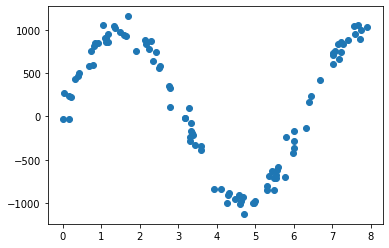

In [ ]:
#@title crear data
rng = np.random.RandomState(1)
x = 8 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

#Create single dimension
X= x[:,np.newaxis]
y= y[:,np.newaxis]

inds = x.ravel().argsort()  # Sort x values and get index
X = X.ravel()[inds].reshape(-1,1)
y = y[inds]*1000 #Sort y according to x sorted index

print(X.shape)
print(y.shape)

#Plot
plt.scatter(X,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234, shuffle=True)
X_train.shape

(80, 1)

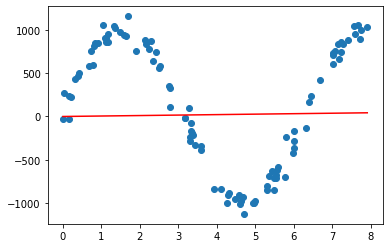

In [ ]:
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, "r")
plt.show()

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.012
Method:                 Least Squares   F-statistic:                            0.08176
Date:                Fri, 03 Feb 2023   Prob (F-statistic):                       0.776
Time:                        02:07:36   Log-Likelihood:                         -640.30
No. Observations:                  80   AIC:                                      1283.
Df Residuals:                      79   BIC:                                      1285.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
y_pred = model.predict(X_test)
rme = mean_squared_error(y_test, y_pred)
print(rme)

508550.411777559


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=4)
X_p = pf.fit_transform(X)
X_train_p = pf.fit_transform(X_train)
X_test_p = pf.transform(X_test)

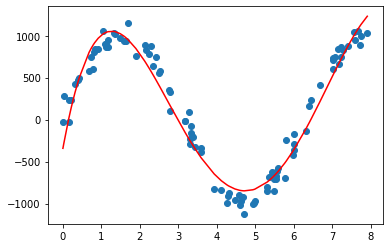

In [ ]:
model2 = sm.OLS(y_train, X_train_p).fit()
y_pred = model2.predict(X_p)
plt.scatter(X, y)
plt.plot(X, y_pred, "r")
plt.show()

In [ ]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     433.9
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           5.16e-51
Time:                        02:30:45   Log-Likelihood:                -510.77
No. Observations:                  80   AIC:                             1032.
Df Residuals:                      75   BIC:                             1043.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -344.0184     73.204     -4.699      0.0

In [ ]:
y_pred = model2.predict(X_test_p)
rme = mean_squared_error(y_test, y_pred)
print(rme)

# **2. Regresión Lineal Multiple**

In [ ]:
#@title Datos
# ==============================================================================
tv = [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7,
      23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4, 237.4, 13.2,
      228.3, 62.3, 262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9, 97.2, 265.6,
      95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6, 206.9, 25.1,
      175.1, 89.7, 239.9, 227.2, 66.9, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9,
      7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1, 69.0, 31.5,
      139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 129.4, 213.4, 16.9, 27.5, 120.5,
      5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7, 88.3, 109.8,
      134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4,
      296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4, 225.8, 241.7, 175.7,
      209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 18.8, 224.0, 123.1, 229.5,
      87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9, 48.3, 25.6, 273.7,
      43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 240.1, 243.2, 38.0, 44.7,
      280.7, 121.0, 197.6, 171.3, 187.8, 4.1, 93.9, 149.8, 11.7, 131.7, 172.5, 85.7,
      188.4, 163.5, 117.2, 234.5, 17.9, 206.8, 215.4, 284.3, 50.0, 164.5, 19.6, 168.4,
      222.4, 276.9, 248.4, 170.2, 276.7, 165.6, 156.6, 218.5, 56.2, 287.6, 253.8, 205.0,
      139.5, 191.1, 286.0, 18.7, 39.5, 75.5, 17.2, 166.8, 149.7, 38.2, 94.2, 177.0,
      283.6, 232.1]

radio = [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6, 5.8, 24.0, 35.1,
         7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7, 5.1, 15.9, 16.9, 12.6, 3.5,
         29.3, 16.7, 27.1, 16.0, 28.3, 17.4, 1.5, 20.0, 1.4, 4.1, 43.8, 49.4, 26.7,
         37.7, 22.3, 33.4, 27.7, 8.4, 25.7, 22.5, 9.9, 41.5, 15.8, 11.7, 3.1, 9.6,
         41.7, 46.2, 28.8, 49.4, 28.1, 19.2, 49.6, 29.5, 2.0, 42.7, 15.5, 29.6, 42.8,
         9.3, 24.6, 14.5, 27.5, 43.9, 30.6, 14.3, 33.0, 5.7, 24.6, 43.7, 1.6, 28.5,
         29.9, 7.7, 26.7, 4.1, 20.3, 44.5, 43.0, 18.4, 27.5, 40.6, 25.5, 47.8, 4.9,
         1.5, 33.5, 36.5, 14.0, 31.6, 3.5, 21.0, 42.3, 41.7, 4.3, 36.3, 10.1, 17.2,
         34.3, 46.4, 11.0, 0.3, 0.4, 26.9, 8.2, 38.0, 15.4, 20.6, 46.8, 35.0, 14.3,
         0.8, 36.9, 16.0, 26.8, 21.7, 2.4, 34.6, 32.3, 11.8, 38.9, 0.0, 49.0, 12.0,
         39.6, 2.9, 27.2, 33.5, 38.6, 47.0, 39.0, 28.9, 25.9, 43.9, 17.0, 35.4, 33.2,
         5.7, 14.8, 1.9, 7.3, 49.0, 40.3, 25.8, 13.9, 8.4, 23.3, 39.7, 21.1, 11.6, 43.5,
         1.3, 36.9, 18.4, 18.1, 35.8, 18.1, 36.8, 14.7, 3.4, 37.6, 5.2, 23.6, 10.6, 11.6,
         20.9, 20.1, 7.1, 3.4, 48.9, 30.2, 7.8, 2.3, 10.0, 2.6, 5.4, 5.7, 43.0, 21.3, 45.1,
         2.1, 28.7, 13.9, 12.1, 41.1, 10.8, 4.1, 42.0, 35.6, 3.7, 4.9, 9.3, 42.0, 8.6]

periodico = [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2, 24.2, 4.0,
             65.9, 7.2, 46.0, 52.9, 114.0, 55.8, 18.3, 19.1, 53.4, 23.5, 49.6, 26.2,
             18.3, 19.5, 12.6, 22.9, 22.9, 40.8, 43.2, 38.6, 30.0, 0.3, 7.4, 8.5, 5.0,
             45.7, 35.1, 32.0, 31.6, 38.7, 1.8, 26.4, 43.3, 31.5, 35.7, 18.5, 49.9,
             36.8, 34.6, 3.6, 39.6, 58.7, 15.9, 60.0, 41.4, 16.6, 37.7, 9.3, 21.4, 54.7,
             27.3, 8.4, 28.9, 0.9, 2.2, 10.2, 11.0, 27.2, 38.7, 31.7, 19.3, 31.3, 13.1,
             89.4, 20.7, 14.2, 9.4, 23.1, 22.3, 36.9, 32.5, 35.6, 33.8, 65.7, 16.0, 63.2,
             73.4, 51.4, 9.3, 33.0, 59.0, 72.3, 10.9, 52.9, 5.9, 22.0, 51.2, 45.9, 49.8,
             100.9, 21.4, 17.9, 5.3, 59.0, 29.7, 23.2, 25.6, 5.5, 56.5, 23.2, 2.4, 10.7,
             34.5, 52.7, 25.6, 14.8, 79.2, 22.3, 46.2, 50.4, 15.6, 12.4, 74.2, 25.9, 50.6,
             9.2, 3.2, 43.1, 8.7, 43.0, 2.1, 45.1, 65.6, 8.5, 9.3, 59.7, 20.5, 1.7, 12.9,
             75.6, 37.9, 34.4, 38.9, 9.0, 8.7, 44.3, 11.9, 20.6, 37.0, 48.7, 14.2, 37.7,
             9.5, 5.7, 50.5, 24.3, 45.2, 34.6, 30.7, 49.3, 25.6, 7.4, 5.4, 84.8, 21.6, 19.4,
             57.6, 6.4, 18.4, 47.4, 17.0, 12.8, 13.1, 41.8, 20.3, 35.2, 23.7, 17.6, 8.3,
             27.4, 29.7, 71.8, 30.0, 19.6, 26.6, 18.2, 3.7, 23.4, 5.8, 6.0, 31.6, 3.6, 6.0,
             13.8, 8.1, 6.4, 66.2, 8.7]

ventas = [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6, 8.6, 17.4, 9.2, 9.7,
          19.0, 22.4, 12.5, 24.4, 11.3, 14.6, 18.0, 12.5, 5.6, 15.5, 9.7, 12.0, 15.0, 15.9,
          18.9, 10.5, 21.4, 11.9, 9.6, 17.4, 9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1,
          20.7, 12.9, 8.5, 14.9, 10.6, 23.2, 14.8, 9.7, 11.4, 10.7, 22.6, 21.2, 20.2, 23.7,
          5.5, 13.2, 23.8, 18.4, 8.1, 24.2, 15.7, 14.0, 18.0, 9.3, 9.5, 13.4, 18.9, 22.3,
          18.3, 12.4, 8.8, 11.0, 17.0, 8.7, 6.9, 14.2, 5.3, 11.0, 11.8, 12.3, 11.3, 13.6,
          21.7, 15.2, 12.0, 16.0, 12.9, 16.7, 11.2, 7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5,
          25.4, 17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2, 7.2, 8.7, 5.3, 19.8, 13.4, 21.8,
          14.1, 15.9, 14.6, 12.6, 12.2, 9.4, 15.9, 6.6, 15.5, 7.0, 11.6, 15.2, 19.7, 10.6,
          6.6, 8.8, 24.7, 9.7, 1.6, 12.7, 5.7, 19.6, 10.8, 11.6, 9.5, 20.8, 9.6, 20.7, 10.9,
          19.2, 20.1, 10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16.1, 11.6, 16.6, 19.0, 15.6,
          3.2, 15.3, 10.1, 7.3, 12.9, 14.4, 13.3, 14.9, 18.0, 11.9, 11.9, 8.0, 12.2, 17.1,
          15.0, 8.4, 14.5, 7.6, 11.7, 11.5, 27.0, 20.2, 11.7, 11.8, 12.6, 10.5, 12.2, 8.7,
          26.2, 17.6, 22.6, 10.3, 17.3, 15.9, 6.7, 10.8, 9.9, 5.9, 19.6, 17.3, 7.6, 9.7, 12.8,
          25.5, 13.4]

datos = pd.DataFrame({'tv': tv, 'radio': radio, 'periodico':periodico, 'ventas': ventas})
datos.head(10)

,tv,radio,periodico,ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [ ]:
datos.shape

(200, 4)

In [ ]:
datos.corr()

,tv,radio,periodico,ventas
tv,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
periodico,0.056648,0.354104,1.000000,0.228299
ventas,0.782224,0.576223,0.228299,1.000000


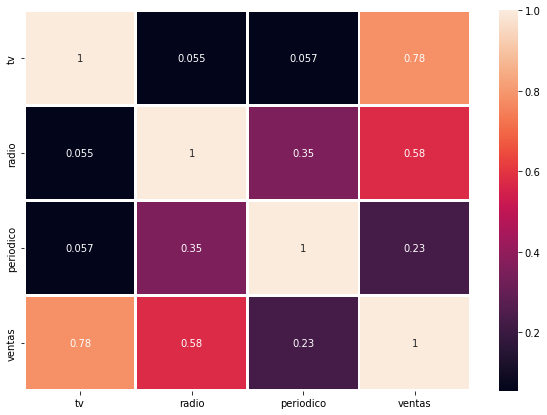

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(datos.corr(),annot=True,linewidths=2)
plt.show()

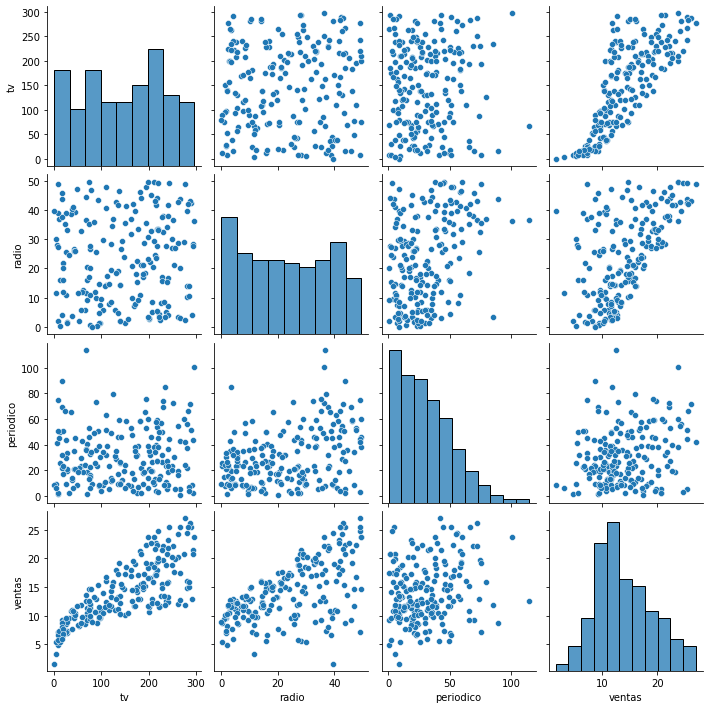

In [ ]:
sns.pairplot(datos)

In [ ]:
X = datos[['tv', 'radio', 'periodico']]
y = datos['ventas']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     437.8
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           1.01e-75
Time:                        01:38:39   Log-Likelihood:                -308.29
No. Observations:                 160   AIC:                             624.6
Df Residuals:                     156   BIC:                             636.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8497      0.365      7.803      0.0

In [ ]:
X_train.drop(columns="periodico", inplace = True)
X_test.drop(columns="periodico", inplace = True)

In [ ]:
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     660.3
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           3.69e-77
Time:                        02:02:51   Log-Likelihood:                -308.36
No. Observations:                 160   AIC:                             622.7
Df Residuals:                     157   BIC:                             631.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9004      0.335      8.652      0.0

In [ ]:
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,2.238211,3.562549
tv,0.042439,0.048701
radio,0.172853,0.207942


In [ ]:
X_test = sm.add_constant(X_test, prepend=True)
y_pred = modelo.predict(exog = X_test)
rmse = mean_squared_error(y_test, y_pred)
rme = mean_squared_error(y_test, y_pred, squared = False)
print(f"El MSE es {rmse}")
print(f"El RMSE es {rme}")

El MSE es 2.8751297278648793
El RMSE es 1.6956207500101192


# **3. Utilizando un dataset diferente**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/aurea-soriano/ML-Datasets/master/USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


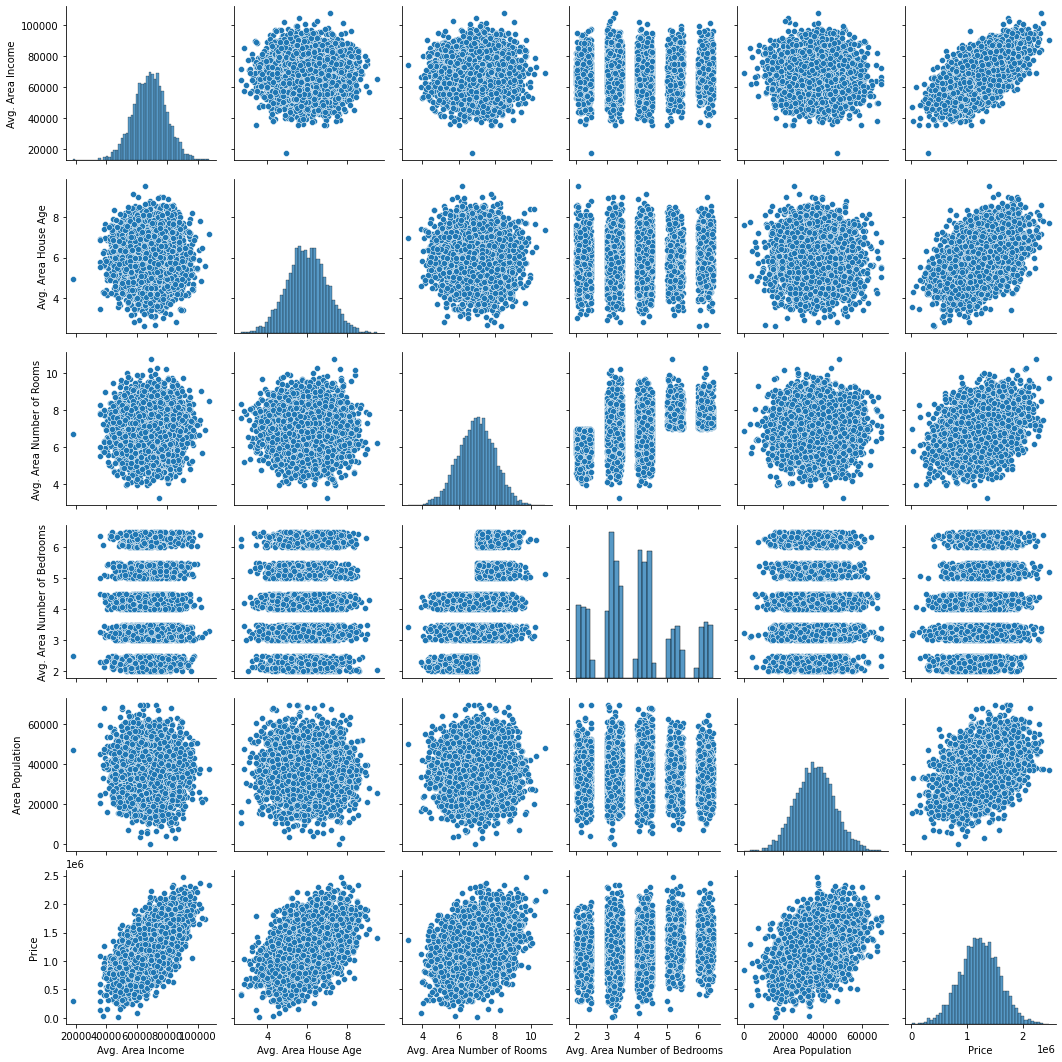

In [ ]:
sns.pairplot(df)

In [ ]:
#Matriz de correlacion
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


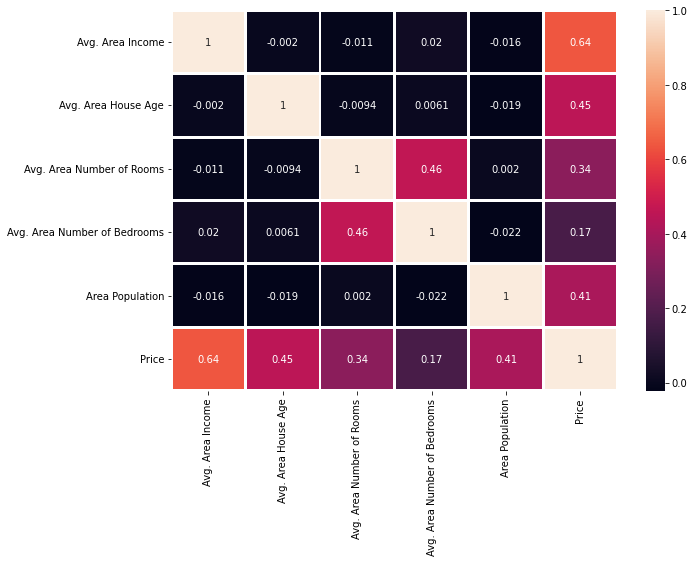

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

In [ ]:
l_column = list(df.columns) # Haciendo una lista de las columnas
len_feature = len(l_column) # Longitud de la lista de vectores de columna
print('Número de columnas', len_feature, '\n Nombres: \n',l_column)

Número de columnas 7 
 Nombres: 
 ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address']


In [ ]:
X=df.select_dtypes(include = np.number).copy()
X.drop(columns = ["Price"], inplace = True)
y = df["Price"]
print("Tamaño de Características:",X.shape)
print("Tamaño de Variable Objetivo:",y.shape)

Tamaño de Características: (5000, 5)
Tamaño de Variable Objetivo: (5000,)


In [ ]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print("Tamaño del conjunto de características del entrenamiento:",X_train.shape)
print("Tamaño del conjunto de características de prueba:",X_test.shape)
print("Tamaño de la variable objetivo del entrenamiento:",y_train.shape)
print("Tamaño de la variable objetivo de prueba:",y_test.shape)

Tamaño del conjunto de características del entrenamiento: (4000, 5)
Tamaño del conjunto de características de prueba: (1000, 5)
Tamaño de la variable objetivo del entrenamiento: (4000,)
Tamaño de la variable objetivo de prueba: (1000,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

In [ ]:
X_train_sc = pd.DataFrame(X_train_sc, columns = X_train.columns)
X_test_sc  = pd.DataFrame(X_test_sc, columns = X_test.columns)

## **3.1 Regresion Lineal**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
lm = LinearRegression() # Creando un objeto de Regresión Lineal 'lm'

**Entrenamiento**

In [ ]:
lm.fit(X_train_sc,y_train) # Ajuste el modelo lineal en el objeto 'lm' en sí, es decir, no es necesario establecer esto en otra variable

LinearRegression()

Verificamos la intercepción y los coeficientes y los colocamos en un DataFrame

In [ ]:
print("El término de intersección del modelo lineal:", lm.intercept_)
print("Los coeficientes del modelo lineal:", lm.coef_)
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
cdf

El término de intersección del modelo lineal: -1409688.450407128
Los coeficientes del modelo lineal: [1943714.49869916 1132161.02931772  897997.75780093    7712.98739683
 1056923.93791662]


,Coefficients
Avg. Area Income,1.943714e+06
Avg. Area House Age,1.132161e+06
Avg. Area Number of Rooms,8.979978e+05
Avg. Area Number of Bedrooms,7.712987e+03
Area Population,1.056924e+06


Error estándar y estadistica t

In [ ]:
n = X_train_sc.shape[0]
k = X_train_sc.shape[1]
dfN = n-k

train_pred=lm.predict(X_train_sc)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0,0,0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train_sc[list(X_train_sc.columns)[i]]-X_train_sc[list(X_train_sc.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
Avg. Area Income,1.943714e+06,13451.335465,144.499742
Avg. Area House Age,1.132161e+06,11012.008695,102.811491
Avg. Area Number of Rooms,8.979978e+05,11866.158237,75.677211
Avg. Area Number of Bedrooms,7.712987e+03,5776.908824,1.335141
Area Population,1.056924e+06,11081.697394,95.375636


In [ ]:
print("Por lo tanto, las características organizadas en orden de importancia para predecir el precio de la vivienda\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

print("\n Valor del R cuadrado de este ajuste:",round(metrics.r2_score(y_train,train_pred),3))

Por lo tanto, las características organizadas en orden de importancia para predecir el precio de la vivienda
------------------------------------------------------------------------------------------
Avg. Area Income > 
Avg. Area House Age > 
Area Population > 
Avg. Area Number of Rooms > 
Avg. Area Number of Bedrooms

 Valor del R cuadrado de este ajuste: 0.918


**Predicción en el conjunto de test usando el modelo lm obtención de metricas**

In [ ]:
predictions = lm.predict(X_test_sc)
print ("Tipo del objeto predicho :", type(predictions))
print ("Tamaño del objeto predicho:", predictions.shape)

Tipo del objeto predicho : <class 'numpy.ndarray'>
Tamaño del objeto predicho: (1000,)


Diagrama de dispersión (Scatterplot) del precio previsto y el conjunto de prueba y para ver si los datos caen en una línea recta de 45 grados

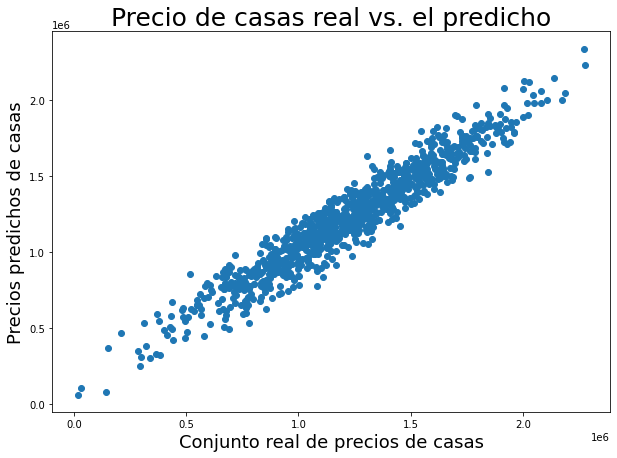

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Precio de casas real vs. el predicho",fontsize=25)
plt.xlabel("Conjunto real de precios de casas",fontsize=18)
plt.ylabel("Precios predichos de casas", fontsize=18)
plt.scatter(x=y_test,y=predictions)

**Hacer lo mismo con STATSMODELS**

In [ ]:
X_train_sc2 = sm.add_constant(X_train_sc, prepend=True)
modelo = sm.OLS(endog=y_train.values, exog=X_train_sc2)
modelo = modelo.fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     8915.
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:34:28   Log-Likelihood:                -51743.
No. Observations:                4000   AIC:                         1.035e+05
Df Residuals:                    3994   BIC:                         1.035e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## **3.2 Regresion usando el modelo RIDGE**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
modelR = Ridge(alpha=1.0)
modelR.fit(X_train_sc, y_train)
predictions = modelR.predict(X_test_sc)
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("Valor R-squared de las predicciones:",round(metrics.r2_score(y_test,predictions),3))

Mean square error (MSE): 10837253441.27528
Root mean square error (RMSE): 104102.12985945716
Valor R-squared de las predicciones: 0.919


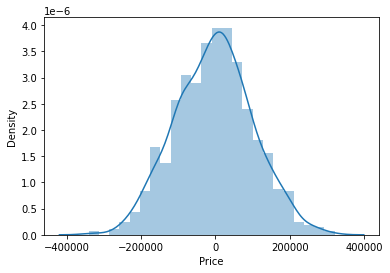

In [ ]:
sns.distplot(y_test-predictions)
plt.show()

**Ajustar con crossvalidation**

In [ ]:
params = {
    'alpha':[0,.0001, 0.001,0.01,1, 1.1, 1.2, 1.5, 2],
    'fit_intercept':[True,False],
    'normalize':[True,False]
       }

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
modelR = Ridge()
search = GridSearchCV(modelR, params, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, verbose = 1)
results = search.fit(X_train_sc, y_train)

print(f"Mejor score RMSE: {np.absolute(results.best_score_)}")
print(f"Mejores Hiperparámetros: {results.best_params_}")

Fitting 30 folds for each of 36 candidates, totalling 1080 fits
Mejor score RMSE: 100499.62962904434
Mejores Hiperparámetros: {'alpha': 0.0001, 'fit_intercept': True, 'normalize': True}


In [ ]:
modelR = Ridge(alpha=0.0001, fit_intercept = True, normalize= True)
modelR.fit(X_train_sc, y_train)
predictions = modelR.predict(X_test_sc)
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("Valor R-squared de las predicciones:",round(metrics.r2_score(y_test,predictions),3))

Mean square error (MSE): 10806984754.603395
Root mean square error (RMSE): 103956.64843868042
Valor R-squared de las predicciones: 0.919


**Usando RIDGE CV**




In [ ]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[0.001, 0.01, 1])
clf.fit(X_train, y_train)
clf.score(X,y)

0.9180037035517837

## **3.3 Regression usando el modelo LASSO**

In [ ]:
from sklearn.linear_model import Lasso
modelL = Lasso(alpha=1.0)
modelL.fit(X_train_sc, y_train)
predictions = modelL.predict(X_test_sc)
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("Valor R-squared de las predicciones:",round(metrics.r2_score(y_test,predictions),3))

Mean square error (MSE): 10806954137.827425
Root mean square error (RMSE): 103956.50118115473
Valor R-squared de las predicciones: 0.919


In [ ]:
params = {
    'alpha':[0,.0001, 0.001,0.01, 0.01,1, 1.1, 1.2, 1.5, 2],
    'fit_intercept':[True,False],
    'normalize':[True,False]
       }

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
modelL = Lasso()
search = GridSearchCV(modelL, params, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, verbose = 1)
results = search.fit(X_train_sc, y_train)

print(f"Mejor score RMSE: {np.absolute(results.best_score_)}")
print(f"Mejores Hiperparámetros: {results.best_params_}")

Fitting 30 folds for each of 40 candidates, totalling 1200 fits
Mejor score RMSE: 100499.6366086472
Mejores Hiperparámetros: {'alpha': 2, 'fit_intercept': True, 'normalize': False}


In [ ]:
modelL = Ridge(alpha=2, fit_intercept = True, normalize= False)
modelL.fit(X_train_sc, y_train)
predictions = modelL.predict(X_test_sc)
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("Valor R-squared de las predicciones:",round(metrics.r2_score(y_test,predictions),3))

Mean square error (MSE): 10923436411.269493
Root mean square error (RMSE): 104515.24487494394
Valor R-squared de las predicciones: 0.918


## **3.4 Regresion usando Vectores de soporte**

In [ ]:
from sklearn.svm import SVR
svr_reg = SVR(kernel="linear", C=1.0, epsilon=0.1)
svr_reg .fit(X_train_sc, y_train)

SVR(kernel='linear')

In [ ]:
predictions = svr_reg.predict(X_test_sc)
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("Valor R-squared de las predicciones:",round(metrics.r2_score(y_test,predictions),3))

Mean square error (MSE): 133265176706.60274
Root mean square error (RMSE): 365055.0324356627
Valor R-squared de las predicciones: -0.001


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    "C":[0.01, 0.1, 0.5, 1],
    "epsilon":[0.001, 0.1, 0.5, 1]
    }

grid_s = GridSearchCV(svr_reg, param_grid=params, scoring="neg_root_mean_squared_error", return_train_score=True, cv=5, verbose=1)
grid_s.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'epsilon': [0.001, 0.1, 0.5, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [ ]:
print(f"Mejor score RMSE: {np.absolute(grid_s.best_score_)}")
print(f"Mejores Hiperparámetros: {grid_s.best_params_}")

Mejor score RMSE: 223772.4494225098
Mejores Hiperparámetros: {'C': 1, 'epsilon': 0.001}


In [ ]:
svr_reg = SVR(kernel="linear", C=1.0, epsilon=0.001)
svr_reg .fit(X_train_sc, y_train)
predictions = svr_reg.predict(X_test_sc)
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("Valor R-squared de las predicciones:",round(metrics.r2_score(y_test,predictions),3))

Mean square error (MSE): 133265176706.60274
Root mean square error (RMSE): 365055.0324356627
Valor R-squared de las predicciones: -0.001


## **3.5 Regresion usando Random Forest**

### **3.5.1 Usando un arbol de decisión**

(100, 1)
(100, 1)


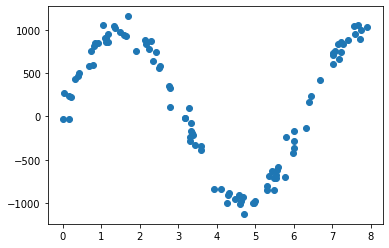

In [ ]:
#@title crear data
rng = np.random.RandomState(1)
x = 8 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

#Create single dimension
X= x[:,np.newaxis]
y= y[:,np.newaxis]

inds = x.ravel().argsort()  # Sort x values and get index
X_p = X.ravel()[inds].reshape(-1,1)
y_p = y[inds]*1000 #Sort y according to x sorted index

print(X_p.shape)
print(y_p.shape)

#Plot
plt.scatter(X_p,y_p)

In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeRegressor(random_state=1234,
                                        max_depth=5,
                                        max_leaf_nodes = 15,
                                        min_samples_leaf = 5
                                        )
tree_model.fit(X_p,y_p)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=15, min_samples_leaf=5,
                      random_state=1234)

In [ ]:
!pip install dtreeviz

In [ ]:
tr = tree.export_text(tree_model)
print(tr)

In [ ]:
import dtreeviz
viz_model = dtreeviz.model(tree_model, X_p,y_p)
v = viz_model.view()
v.show()
v.save("sample.svg")

In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeRegressor(max_leaf_nodes=15, min_samples_leaf = 5, random_state=1234)
tree_model.fit(X_train_sc, y_train)
#show_importances(tree_model)

DecisionTreeRegressor(max_leaf_nodes=15, min_samples_leaf=5, random_state=1234)

In [ ]:
predictions = tree_model.predict(X_test_sc)
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("Valor R-squared de las predicciones:",round(metrics.r2_score(y_test,predictions),3))

Mean square error (MSE): 53988227968.730286
Root mean square error (RMSE): 232353.67001347383
Valor R-squared de las predicciones: 0.594


In [ ]:
tr = tree.export_text(tree_model)
print(tr)

In [ ]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(tree_model, X_train, y_train)
viz.save("Img.svg")

In [ ]:
#@title importancias
def show_importances(model):
  importance = model.feature_importances_
  print("importancia de las variables", importance)
  for i, v in enumerate(importance):
    print(f"Variable {i}, Score: {v}")
  plt.bar([x for x in range(len(importance))], importance)
  plt.show()

### **3.5.2 Usando Random Forest**

importancia de las variables [0.53521726 0.22586652 0.06609509 0.         0.17282113]
Variable 0, Score: 0.535217263166961
Variable 1, Score: 0.22586651701585128
Variable 2, Score: 0.0660950855404556
Variable 3, Score: 0.0
Variable 4, Score: 0.172821134276732


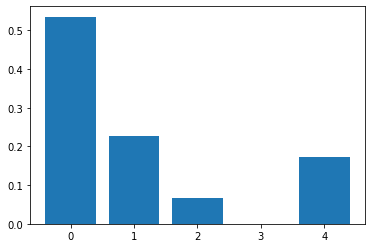

Mean square error (MSE): 38459678119.43717
Root mean square error (RMSE): 196111.39212049148
Valor R-squared de las predicciones: 0.711


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(max_depth=5, max_leaf_nodes=20, random_state=1234, n_estimators=20)
RF_model.fit(X_train_sc, y_train)
show_importances(RF_model)
predictions = RF_model.predict(X_test_sc)
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("Valor R-squared de las predicciones:",round(metrics.r2_score(y_test,predictions),3))

### **Busqueda de los mejores hiperparámetros**

In [ ]:
np.arange(50, 500, 10)

array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300,
       310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430,
       440, 450, 460, 470, 480, 490])

In [ ]:
n_estimators = [int(x) for x in np.arange(50, 500, 10)]
max_features = ['auto', 'sqrt', None, "log2"]
max_depth = [int(x) for x in np.arange(5, 100, 5)]
min_samples_leaf = [5, 10, 15]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
grid_search = GridSearchCV(RandomForestRegressor(),
                           param_grid=random_grid)
grid_search.fit(X_train_sc, y_train)

In [ ]:
RF_model = RandomForestRegressor()
rf_random = RandomizedSearchCV(
                estimator = RF_model,
                param_distributions = random_grid,
                n_iter = 100,
                cv = 3,
                verbose=1,
                random_state=1234,
                n_jobs = -1)
rf_random.fit(X_train_sc, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, 55, 60, 65,
                                                      70, 75, 80, 85, 90, 95],
                                        'max_features': ['auto', 'sqrt', None,
                                                         'log2'],
                                        'min_samples_leaf': [5, 10, 15],
                                        'n_estimators': [50, 60, 70, 80, 90,
                                                         100, 110, 120, 130,
                                                         140, 150, 160, 170,
                                                         180, 190, 200, 210,
                                                         220, 230, 

In [ ]:
print(f"Mejores Hiperparámetros: {rf_random.best_params_}")
rf_random.best_score_

Mejores Hiperparámetros: {'n_estimators': 490, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}


0.8728386462666355

importancia de las variables [0.44627563 0.23521589 0.12166899 0.00723911 0.18960039]
Variable 0, Score: 0.44627562712711255
Variable 1, Score: 0.23521588808560195
Variable 2, Score: 0.12166899275366769
Variable 3, Score: 0.007239106517680044
Variable 4, Score: 0.18960038551593783


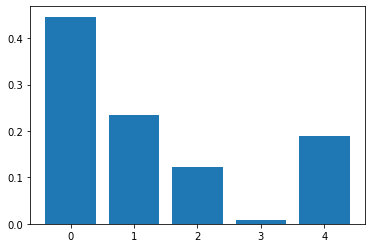

Mean square error (MSE): 16453606772.828886
Root mean square error (RMSE): 128271.61327756381
Valor R-squared de las predicciones: 0.876


In [ ]:
RF_model = RandomForestRegressor(min_samples_leaf = 5, max_depth=40, random_state=1234, max_features= 'auto', n_estimators=490, bootstrap= True)
RF_model.fit(X_train_sc, y_train)
show_importances(RF_model)
predictions = RF_model.predict(X_test_sc)
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("Valor R-squared de las predicciones:",round(metrics.r2_score(y_test,predictions),3))

## **3.6 Regresion Polinomial**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=3)
X_train_p = pf.fit_transform(X_train)
X_test_p = pf.fit_transform(X_test)
model_pol = sm.OLS(y_train, X_train_p).fit()
predictions = model_pol.predict(X_test_p)
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("Valor R-squared de las predicciones:",round(metrics.r2_score(y_test,predictions),3))

## **3.7 Regresión usando XGBOOST**

In [ ]:
from xgboost import XGBRegressor
# Instantiation
xgb_r = XGBRegressor(n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train_sc, y_train)
predictions = xgb_r.predict(X_test_sc)
print("Mean square error (MSE):", mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(mean_squared_error(y_test,predictions)))
print("Valor R-squared de las predicciones:",round(r2_score(y_test,predictions),3))

[00:59:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean square error (MSE): 238464015453.78098
Root mean square error (RMSE): 488327.7746081836
Valor R-squared de las predicciones: -0.792


In [ ]:
%%time
xgb_random = RandomizedSearchCV(
                estimator = xgb_r,
                param_distributions = random_grid,
                n_iter = 40,
                cv = 3,
                verbose=1,
                random_state=1234,
                n_jobs = -1)
xgb_random.fit(X_train_sc, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[01:05:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 2.42 s, sys: 199 ms, total: 2.62 s
Wall time: 6min 3s


RandomizedSearchCV(cv=3, estimator=XGBRegressor(n_estimators=10, seed=123),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, 55, 60, 65,
                                                      70, 75, 80, 85, 90, 95],
                                        'max_features': ['auto', 'sqrt', None,
                                                         'log2'],
                                        'min_samples_leaf': [5, 10, 15],
                                        'n_estimators': [50, 60, 70, 80, 90,
                                                         100, 110, 120, 130,
                                                         140, 150, 160, 170,
                                                         180, 190, 200, 210,
                                                   

In [ ]:
print(f"Mejores Hiperparámetros: {xgb_random.best_params_}")
xgb_random.best_score_

Mejores Hiperparámetros: {'n_estimators': 60, 'min_samples_leaf': 10, 'max_features': None, 'max_depth': 5, 'bootstrap': False}


0.8918119717813081

[02:33:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
importancia de las variables [0.4255764  0.2588165  0.11996865 0.00550872 0.19012971]
Variable 0, Score: 0.425576388835907
Variable 1, Score: 0.25881651043891907
Variable 2, Score: 0.11996865272521973
Variable 3, Score: 0.005508724600076675
Variable 4, Score: 0.19012971222400665


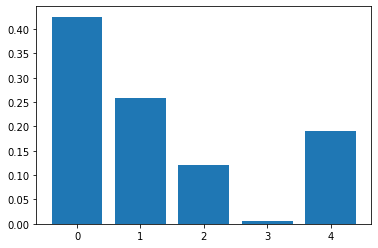

Mean square error (MSE): 13345775529.608555
Root mean square error (RMSE): 115523.91756518888
Valor R-squared de las predicciones: 0.9


In [ ]:
xgb_model = XGBRegressor(min_samples_leaf = 10, max_depth=5, random_state=1234, max_features= None, n_estimators=60, bootstrap= False)
xgb_model.fit(X_train_sc, y_train)
show_importances(xgb_model)
predictions = xgb_model.predict(X_test_sc)
print("Mean square error (MSE):", mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(mean_squared_error(y_test,predictions)))
print("Valor R-squared de las predicciones:",round(r2_score(y_test,predictions),3))

In [ ]:
from lightgbm import LGBMRegressor
lgbm_r = LGBMRegressor(n_estimators = 10, seed = 123)

In [ ]:
%%time
lgbm_random = RandomizedSearchCV(
                estimator = lgbm_r,
                param_distributions = random_grid,
                n_iter = 40,
                cv = 3,
                verbose=3,
                random_state=1234,
                n_jobs = -1)
lgbm_random.fit(X_train_sc, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
CPU times: user 666 ms, sys: 56.2 ms, total: 722 ms
Wall time: 41.9 s


RandomizedSearchCV(cv=3, estimator=LGBMRegressor(n_estimators=10, seed=123),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, 55, 60, 65,
                                                      70, 75, 80, 85, 90, 95],
                                        'max_features': ['auto', 'sqrt', None,
                                                         'log2'],
                                        'min_samples_leaf': [5, 10, 15],
                                        'n_estimators': [50, 60, 70, 80, 90,
                                                         100, 110, 120, 130,
                                                         140, 150, 160, 170,
                                                         180, 190, 200, 210,
                                                  

In [ ]:
print(f"Mejores Hiperparámetros: {lgbm_random.best_params_}")
lgbm_random.best_score_

Mejores Hiperparámetros: {'n_estimators': 80, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


0.8960639626544372

importancia de las variables [0.4255764  0.2588165  0.11996865 0.00550872 0.19012971]
Variable 0, Score: 0.425576388835907
Variable 1, Score: 0.25881651043891907
Variable 2, Score: 0.11996865272521973
Variable 3, Score: 0.005508724600076675
Variable 4, Score: 0.19012971222400665


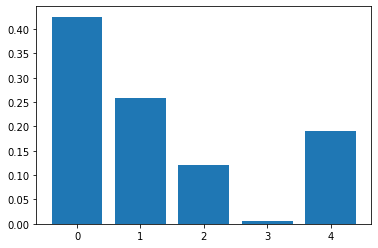

Mean square error (MSE): 13264604569.01167
Root mean square error (RMSE): 115172.06505490674
Valor R-squared de las predicciones: 0.9


In [ ]:
lgbm_model = LGBMRegressor(min_samples_leaf = 10, max_depth=10, random_state=1234, max_features= 'sqrt', n_estimators=80, bootstrap= False)
lgbm_model.fit(X_train_sc, y_train)
show_importances(xgb_model)
predictions = lgbm_model.predict(X_test_sc)
print("Mean square error (MSE):", mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(mean_squared_error(y_test,predictions)))
print("Valor R-squared de las predicciones:",round(r2_score(y_test,predictions),3))

In [ ]:
import pickle
model_name = "lgbm_model.sav"
pickle.dump(lgbm_model, open(model_name, "wb"))

In [ ]:
model_lbgm = pickle.load(open(model_name, "rb"))
predictions = model_lbgm.predict(X_test_sc)
print("Mean square error (MSE):", mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(mean_squared_error(y_test,predictions)))
print("Valor R-squared de las predicciones:",round(r2_score(y_test,predictions),3))

Mean square error (MSE): 13264604569.01167
Root mean square error (RMSE): 115172.06505490674
Valor R-squared de las predicciones: 0.9


In [ ]:
import joblib
model_name = "lgbm_model2.sav"
joblib.dump(lgbm_model, model_name)
model_lbgm2 = joblib.load(model_name)
predictions = model_lbgm2.predict(X_test_sc)
print("Mean square error (MSE):", mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(mean_squared_error(y_test,predictions)))
print("Valor R-squared de las predicciones:",round(r2_score(y_test,predictions),3))

Mean square error (MSE): 13264604569.01167
Root mean square error (RMSE): 115172.06505490674
Valor R-squared de las predicciones: 0.9


In [ ]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [ ]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2648,63824.394539,4.991750,5.003836,4.00,40086.458749
2456,67041.967661,6.021458,5.346830,3.39,15633.099048
4557,75571.044023,6.114928,7.318214,4.44,33988.435859
4884,64204.720644,4.862155,7.714891,6.21,46157.439165
92,70805.610684,4.443729,5.809147,3.30,29268.826742
...,...,...,...,...,...
4796,60772.830909,6.767671,6.906675,4.35,38147.510257
4337,67846.048656,5.379705,6.103863,4.15,27442.096158
3100,72894.737167,6.029108,6.563053,4.01,37796.055653
1304,82587.586438,5.710322,6.674061,3.46,55932.222733


In [ ]:
y_test

In [ ]:
X_test2 = X_test.copy()
X_test2["Y_true"] = y_test
X_test2["Y_pred"] = predictions

In [ ]:
X_test2.to_excel("resultados.xlsx")